In [62]:
import geopandas as gpd
from shapely import Polygon
import matplotlib.pyplot as plt
from skmob.tessellation import tilers
import matplotlib.pyplot as plt
import seaborn as sns
import math
from shapely import Point
from statannotations.Annotator import Annotator
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("colorblind"))


In [48]:
data = gp.read_file("data/geolife/geolife_raw.geojson", geometry='geometry')

In [121]:
data[data.start_t.str[:4] == '2008'].traj_id.nunique()

6291

# Plot tessellations

In [14]:
tessellation_freemove = gp.read_file("data/freemove/tessellation_freemove_200.geojson", geometry='geometry')

KeyboardInterrupt: 

In [45]:
# minx, miny, maxx, maxy = 116.08, 39.66, 116.69, 40.27 # Beijing center
minx, miny, maxx, maxy = 12.562133, 52.099718, 14.129426, 52.803108 # Berlin center
bounding_box = gpd.GeoSeries([Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)])])
bounding_box_gdf = gpd.GeoDataFrame(geometry=bounding_box, crs=4326)

In [ ]:
tessellation = tilers.tiler.get("squared", base_shape="Beijing, China", meters=200)

In [46]:
bounding_box_gdf.explore(cmap="Set1", tiles="CartoDB positron")

# Loss curves E2DTC

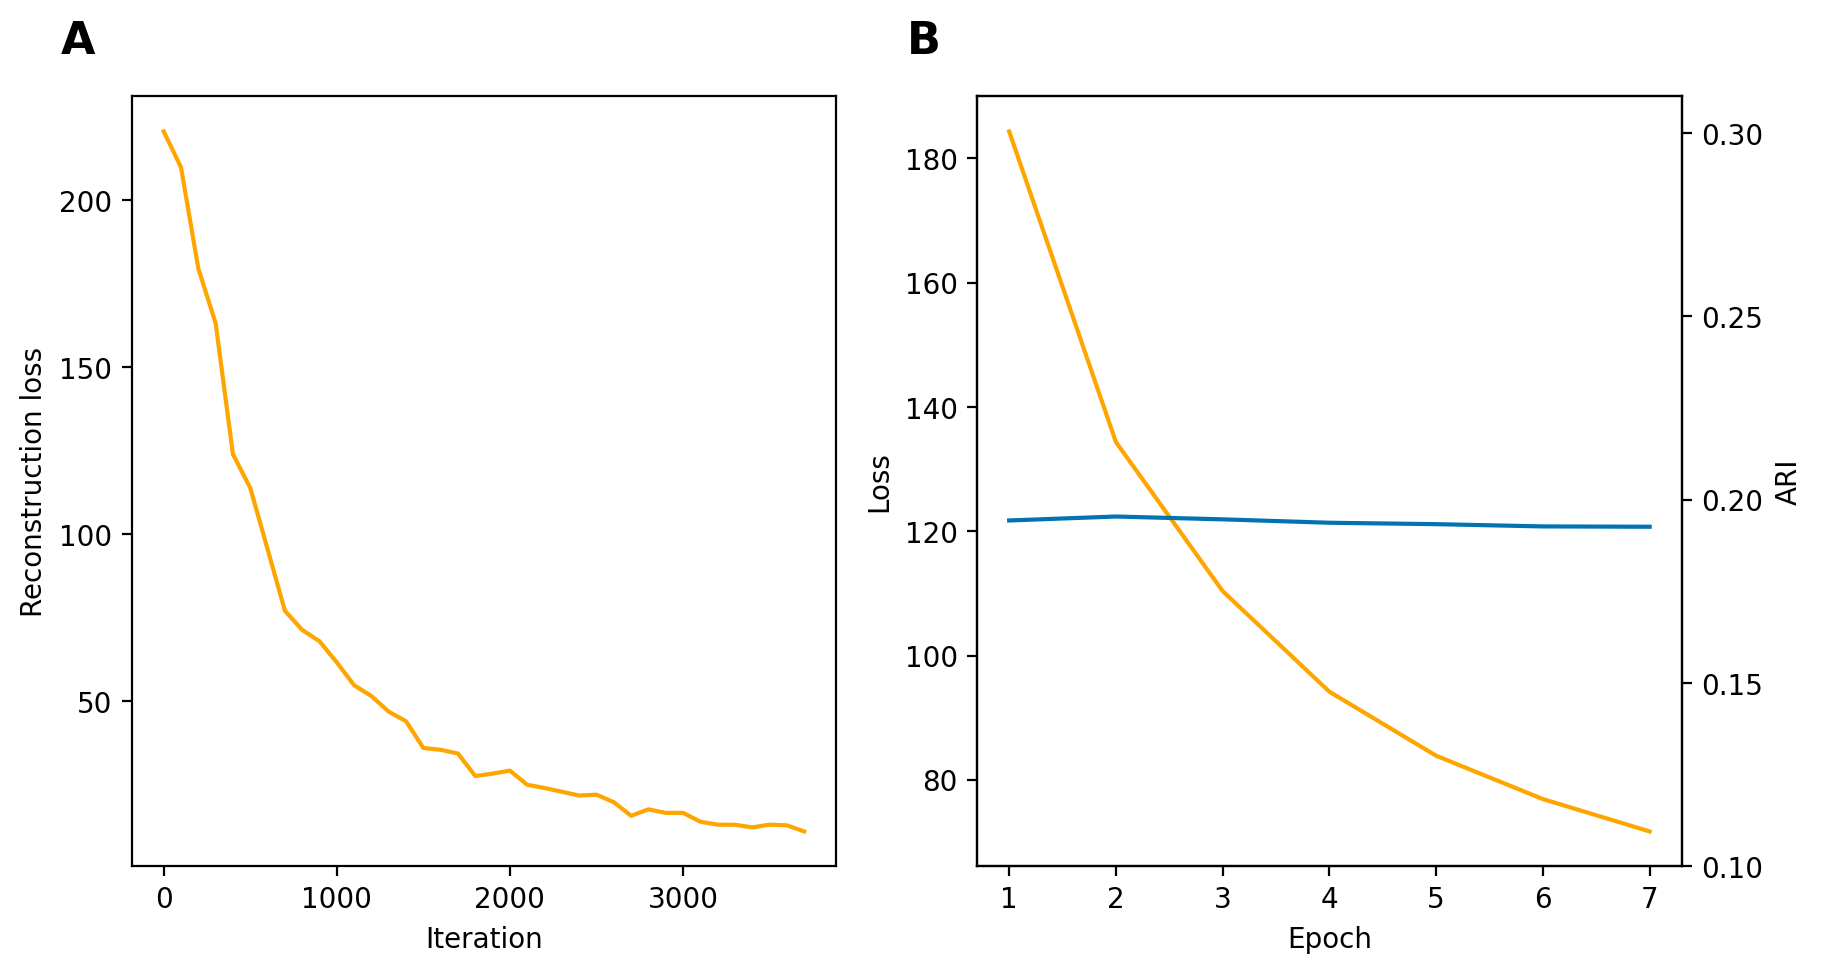

In [116]:
freemove_loss_pretrain = pd.read_csv('data/freemove/E2DTC_pretrain_metrics.csv')
freemove_loss_train = pd.read_csv('data/freemove/E2DTC_train_metrics.csv')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

ax1 = sns.lineplot(x="iteration", y="reconstruction_loss", data=freemove_loss_pretrain, ax=axs[0], color="orange")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Reconstruction loss")

ax2 = sns.lineplot(x="epoch", y="loss", data=freemove_loss_train.iloc[1:,:], ax=axs[1], color="orange")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")

ax2 = axs[1].twinx()
ax2.set_ylim(0.1, 0.31)
ax2.set_yticks(np.arange(0.1, 0.31, 0.05))
sns.lineplot(x="epoch", y="ari", data=freemove_loss_train.iloc[1:,:], ax=ax2)
ax2.set_ylabel("ARI")

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')

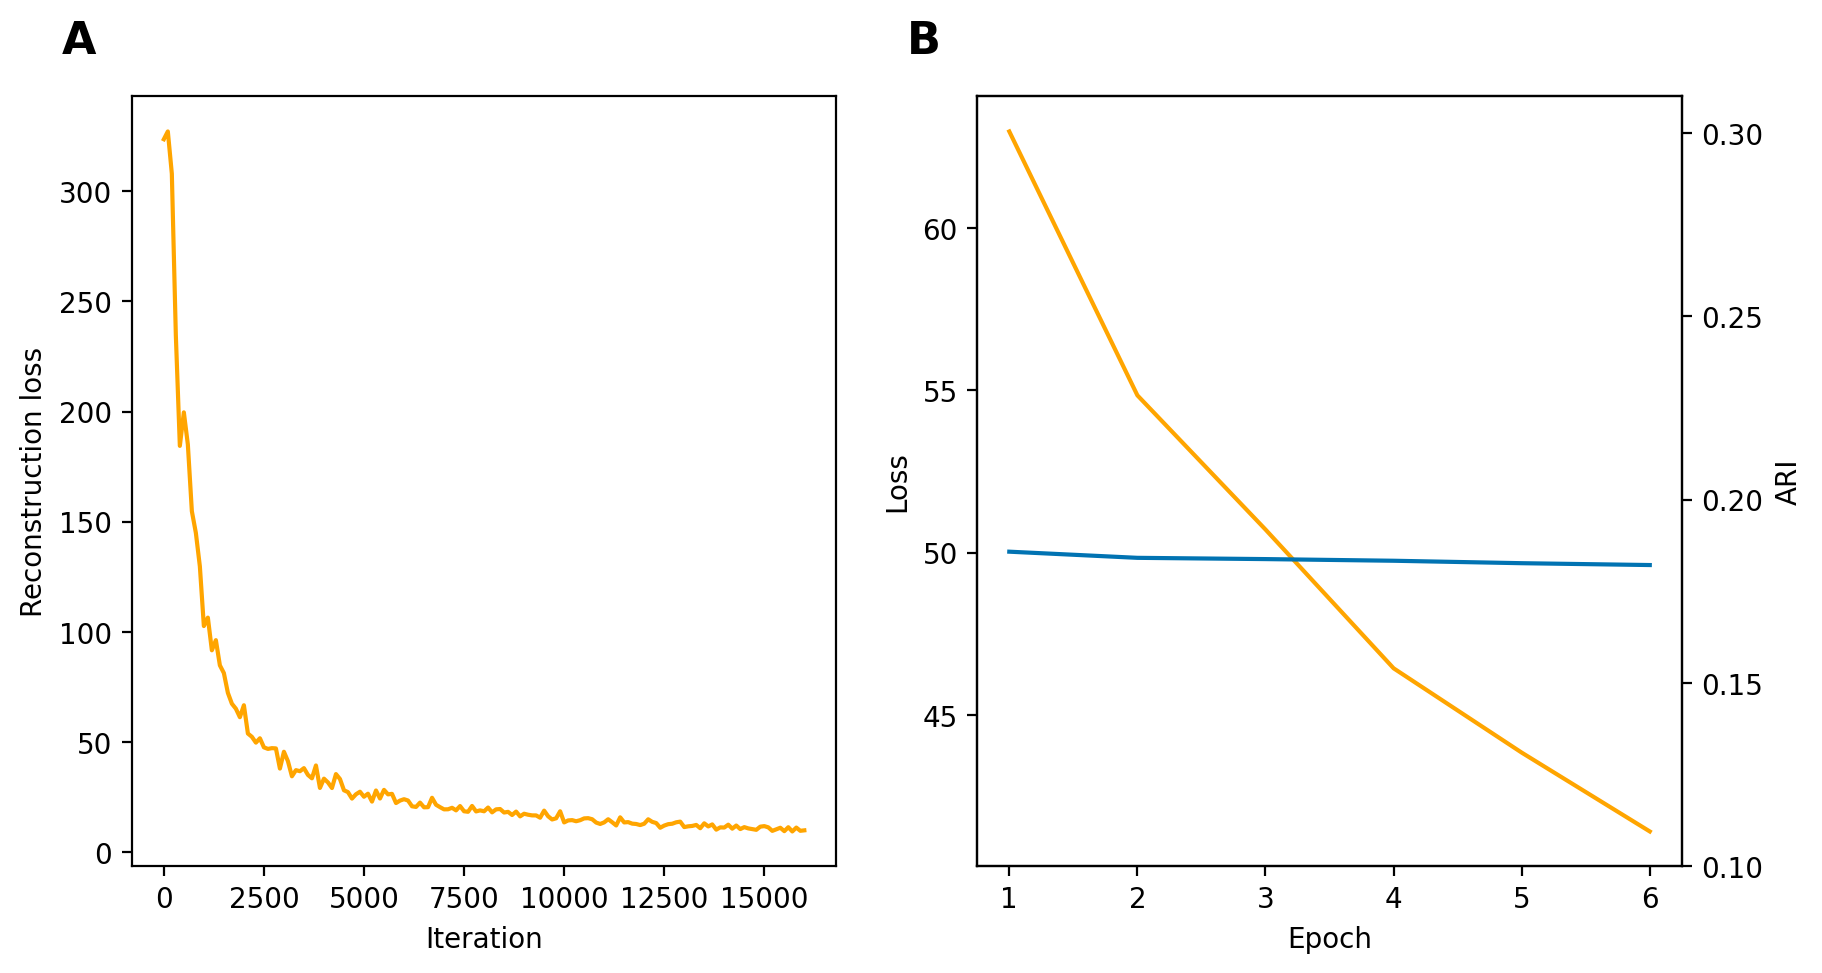

In [115]:
geolife_loss_pretrain = pd.read_csv('data/geolife/E2DTC_pretrain_metrics.csv')
geolife_loss_train = pd.read_csv('data/geolife/E2DTC_train_metrics.csv')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

ax1 = sns.lineplot(x="iteration", y="reconstruction_loss", data=geolife_loss_pretrain, ax=axs[0], color="orange")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Reconstruction loss")

ax2 = sns.lineplot(x="epoch", y="loss", data=geolife_loss_train.iloc[1:,:], ax=axs[1], color="orange")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")

ax2 = axs[1].twinx()
ax2.set_ylim(0.1, 0.31)
ax2.set_yticks(np.arange(0.1, 0.31, 0.05))
sns.lineplot(x="epoch", y="ari", data=geolife_loss_train.iloc[1:,:], ax=ax2)
ax2.set_ylabel("ARI")

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')